# Quake locate on map (regional)
## Stefan Nielsen -- update March 2025

The probability density for each station $s$ is such that
$$
\rho = A\ \exp{ \frac{(R-R_s)^2}{\sigma^2} }
$$
where 
$$
R= \sqrt{(x-x_s)^2+(y-y_s)^2}
$$
for each point (x,y) on the map, and for station position $(x_s,y_s)$. In practice this defines a *ring* of width $\approx \sigma$ and of radiur $R$.  

$R_s$ is the estimated epicentral distance of the earthquake from station $s$. 

$A$ is a normalising factor (in principle, the integral of $\rho$ on the map should be one, if we assume that the earthquake has to be somewhere on the map).

$\sigma$ is the error on the epicentral distance. 

### Init libraries:

In [1]:
import numpy as np
import pandas as pd
%matplotlib ipympl
from matplotlib import pyplot as plt

### Define the probability density *rho* as a *ring* of width *err* and radius *rs* around station located at *xs, ys*:

In [2]:
# probability density function defined:
def rho(xs,ys,rs,x,y,err=1):
    rr=np.sqrt((x-xs)**2+(y-ys)**2)
    den = np.exp( -(rr-rs)**2/err**2 )
    return(den)

### Enter your estimate for the epicentral distance R_xxx (in km) from each station xxx, <br> and error (err) on distance:

In [3]:
R_arc=1054
R_sao=754
R_bks=848
err = 70

### Enter the stations' positions *xsta., ysta.* by replacing the "..." in the code below. 
### The run the cell, which creates a mesh on the map with the probability density for each station (the "rings").
### An additional station is included (4th station ext_d).

In [4]:
# create grid for values in x and y mesh:
xg=np.linspace(-1500,1500,200);
yg=np.linspace(-500,2500,200);
arc_d = np.zeros(  (len(xg),len(yg))  )
sao_d = np.zeros(  (len(xg),len(yg))  )
bks_d = np.zeros(  (len(xg),len(yg))  )
ext_d = np.zeros(  (len(xg),len(yg))  )
# fill the maps with values or rho:
for i, x in enumerate(xg):# in range(len(xg)):
    for j, y in enumerate(yg):# in range(len(yg)):
        #             (xsta., ysta., epi.dist,  gridx, gridy, error)
        arc_d[j,i]=rho(150,   1043,  R_arc,     x,     y,     err)
        sao_d[j,i]=rho(180,    732,  R_sao,     x,     y,     err)
        bks_d[j,i]=rho(300,    789,  R_bks,     x,     y,     err)
        # extra station located at -1000, 0:
        ext_d[j,i]=rho(-1000,  0,   1000,       x,      y,    err)
#
BB, HH = np.meshgrid(xg,yg);

### The following cell creates a figure showing the probability density map for each station, 
### and then the combined probability density of all 3 (product of the 3 densities):

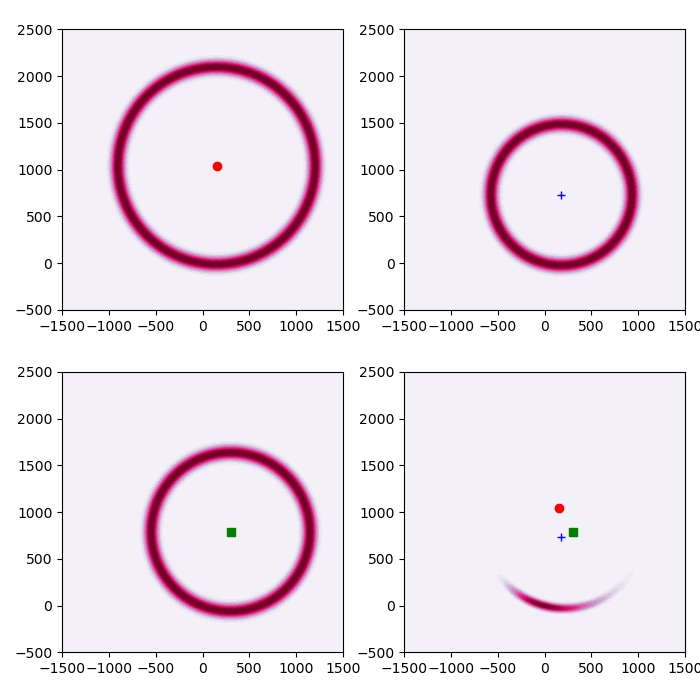

In [5]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(221)
ax1.contourf(BB,HH, arc_d, 20, cmap='PuRd')
ax1.set_aspect(1)
ax1.plot(150,1043,'or')

ax2 = fig.add_subplot(222)
ax2.contourf(BB,HH, sao_d, 20, cmap='PuRd')
ax2.set_aspect(1)
ax2.plot(180,732,'+b')

ax3 = fig.add_subplot(223)
ax3.contourf(BB,HH, bks_d, 20, cmap='PuRd')
ax3.set_aspect(1)
ax3.plot(300,789,'sg')

ax4 = fig.add_subplot(224)
ax4.contourf(BB,HH, bks_d*sao_d*arc_d, 20, cmap='PuRd')
ax4.set_aspect(1)
ax4.plot(150,1043,'or')
ax4.plot(180,732,'+b')
ax4.plot(300,789,'sg')

fig.tight_layout()

### The follwing cell adds the "extra" station, conveniently located in the *Western quadrant* of the plot, to the probability density. 

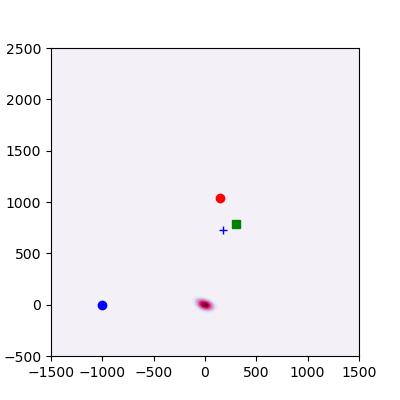

In [6]:
fig2 = plt.figure(figsize=(4,4))

ax5 = fig2.add_subplot(111)
ax5.contourf(BB,HH, bks_d*sao_d*arc_d*ext_d, 20, cmap='PuRd')
ax5.set_aspect(1)
ax5.plot(150,1043,'or')
ax5.plot(180,732,'+b')
ax5.plot(300,789,'sg')
ax5.plot(-1000,0,'ob')

fig.tight_layout()